In [ ]:
import pandas as pd
import os, sys
import numpy as np
import csv
from tqdm import tnrange
import matplotlib.pyplot as plt
sys.path.append('utilities/')
from data_loader import *

In [2]:
# Set the directory where the subfolder with the files is located
dir_path = 'datasets/mega/stuff/csv/'
csv_files=[f for f in os.listdir(dir_path) if f.endswith('.csv')]
csv_files.sort()
csv_files

['20230306-0001_0002.csv',
 '20230306-0001_0003.csv',
 '20230306-0001_0004.csv',
 '20230306-0001_0005.csv',
 '20230306-0001_0006.csv',
 '20230306-0001_0007.csv',
 '20230306-0001_0008.csv',
 '20230306-0001_0009.csv',
 '20230306-0001_0010.csv',
 '20230306-0001_0011.csv',
 '20230306-0001_0012.csv',
 '20230306-0001_0013.csv',
 '20230306-0001_0014.csv',
 '20230306-0001_0015.csv',
 '20230306-0001_0016.csv',
 '20230306-0001_0017.csv',
 '20230306-0001_0018.csv',
 '20230306-0001_0019.csv',
 '20230306-0001_0020.csv',
 '20230306-0001_0021.csv',
 '20230306-0001_0022.csv',
 '20230306-0001_0023.csv',
 '20230306-0001_0024.csv',
 '20230306-0001_0025.csv',
 '20230306-0001_0026.csv',
 '20230306-0001_0027.csv',
 '20230306-0001_0028.csv',
 '20230306-0001_0029.csv',
 '20230306-0001_0030.csv',
 '20230306-0001_0031.csv',
 '20230306-0001_0032.csv',
 '20230306-0001_0033.csv',
 '20230306-0001_0034.csv',
 '20230306-0001_0035.csv',
 '20230306-0001_0036.csv',
 '20230306-0001_0037.csv',
 '20230306-0001_0038.csv',
 

In [43]:

Array=[]

for i in tnrange(len(os.listdir(dir_path)), desc='Processing CSV files'):
    filename = csv_files[i]
    if i%1000==0:
        print(filename)
#     if(i>=100):
#         break
    A=[]
    if filename.endswith(".csv"):
        # Open the CSV file and read the contents
        with open(os.path.join(dir_path, filename), newline='') as csvfile:
            # Open the CSV file and read its contents into a data frame
            data_frame = pd.read_csv(csvfile)
            data_frame = data_frame.reset_index(drop=True)
            data_frame = data_frame.drop(index=[0,1]).reset_index(drop=True)
            # Print the data frame to verify the contents
            #print(csvfile)
            A.append(list(map(float, data_frame['Time'].values)))
            A.append(list(map(float, data_frame['Channel A'].values)))
            B_values=data_frame['Channel B'].values
            B_values=[float(val)if val!='-∞'and val!='∞' else 0 if val=='∞' else float('-inf') for val in B_values]
            A.append(B_values)
            Array.append(A)


/home/mabon/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  This is separate from the ipykernel package so we can avoid doing imports until


Processing CSV files:   0%|          | 0/21100 [00:00<?, ?it/s]

20230306-0001_0002.csv


KeyboardInterrupt: 

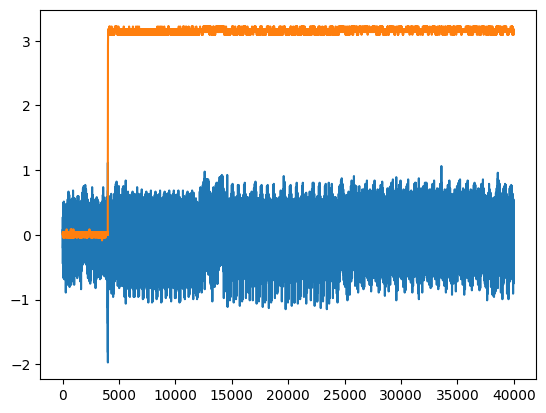

In [55]:
# for i in range(100000):
#     Array[0][2][i]/=100

plt.plot((Array[0][2][0:40000]))
plt.plot((Array[0][1][0:40000]))

In [ ]:
plt.plot(power_trace[1][0:5000])

In [31]:
power_trace=[]
for i in tnrange(10000, desc='Processing CSV files'):
    s=[]
    for j in range(25000 ,40000):
        s.append((Array[i][2][j])/100)
    power_trace.append(s)
power_trace = np.float32(power_trace)

/home/mabon/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  


Processing CSV files:   0%|          | 0/10000 [00:00<?, ?it/s]

IndexError: list index out of range

In [13]:
plt.plot(power_trace[1])

IndexError: list index out of range

In [4]:
# used to save the data
dataDir="temp/"
os.makedirs(dataDir, exist_ok=True)
outpath = os.path.join(dataDir, 'val_diff_key')
np.savez(outpath, power_trace=power_trace)

NameError: name 'power_trace' is not defined

In [ ]:
plt.plot(Array[1])